### 1 데이터셋 로드 및 분석

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/review_1.csv",encoding='cp949')

In [3]:
df.head()

,Unnamed: 0,평점,선택옵션,리뷰
0,0,5,선택옵션 남성양말 상품옵션명 13남성 라인 스포츠양말10켤레 색상 06색상섞기,양말 가격대비 좋습니다첨엔 긴목양말이길래 놀랬는데 서비스로 주신거네요 ㄱㅅ합니다추천합니다
1,1,5,선택옵션 여성양말 상품옵션명 2여성 골지 중목양말10켤레 색상 16아이보리,양말 품질이 좋아 여기서 주문합니다 흰색이 없어 아이보리로 주문했는데 교복에 신어도...
2,2,5,선택옵션 여성양말 상품옵션명 2여성 골지 중목양말10켤레 색상 17오트밀,국산양말입니다 짱짱하고 좋아요 지난번 주문하고 좋아서 다시 찾아 주문했습니다 덤까지...
3,3,5,선택옵션 여성양말 상품옵션명 1여성 무지 중목양말10켤레 색상 07블랙,생각보다 기대이상으로 좋습니다상품의 질도 좋고 색상과 가격면에서코 아주 착하고 마음...
4,4,5,선택옵션 남성양말 상품옵션명 5남성 무지 중목양말10켤레 색상 01그레이,235240칼발 아주 잘 맞고 편해요 은은하게 괭택이 도는데 촌스럽지 않고 적당히 ...


In [4]:
# dimension
df.shape

(220, 4)

In [5]:
# 결측치
df.isnull().sum()

Unnamed: 0    0
평점            0
선택옵션          0
리뷰            0
dtype: int64

In [6]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  220 non-null    int64 
 1   평점          220 non-null    int64 
 2   선택옵션        220 non-null    object
 3   리뷰          220 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.0+ KB


### 2 한국어 텍스트 데이터 전처리

In [7]:
!pip install konlpy==0.5.2 jpype1 Jpype1-py3

In [8]:
# 정규 표현식 함수 정의

import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [13]:
df['리뷰'][0]

'양말 가격대비 좋습니다첨엔 긴목양말이길래 놀랬는데 서비스로 주신거네요 ㄱㅅ합니다추천합니다'

In [14]:
apply_regular_expression(df['리뷰'][0]) # 특수문자 제거 완료

'양말 가격대비 좋습니다첨엔 긴목양말이길래 놀랬는데 서비스로 주신거네요 ㄱㅅ합니다추천합니다'

In [11]:
from konlpy.tag import Okt
from collections import Counter

In [12]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['리뷰'][0]))
nouns

['양말', '가격', '대비', '목', '양말', '서비스', '추천']

In [15]:
# 말뭉치 생성
corpus = "".join(df['리뷰'].tolist())
corpus

'양말 가격대비 좋습니다첨엔 긴목양말이길래 놀랬는데 서비스로 주신거네요 ㄱㅅ합니다추천합니다양말 품질이 좋아 여기서 주문합니다 흰색이 없어 아이보리로 주문했는데 교복에 신어도 괜찮을 것 같습니다국산양말입니다 짱짱하고 좋아요 지난번 주문하고 좋아서 다시 찾아 주문했습니다 덤까지 감사해요생각보다 기대이상으로 좋습니다상품의 질도 좋고 색상과 가격면에서코 아주 착하고 마음에 꼭 듭니다게다가 서비스까지 감사합니다재구매의사 있습니다235240칼발 아주 잘 맞고 편해요 은은하게 괭택이 도는데 촌스럽지 않고 적당히 고급스러워 보여요 아주 짱짱해서 잘 안늘어날 것 같아요사은품으로 시킨것과 동일한 양말 1켤레와 다른 디자인의 양말 2켤레 주심한달사용기중목양말이 필요해서 샀는데 자꾸 흘러내려서 좀 난감해요ㅋㅋㅋ 자꾸 끌어올리긴 하지만 그래도 내려가요 그래서 여기서 구매한 다른 양말 신게 되더라구요ㅋㅋㅋ양말 이제 여기서만 사야겠어요품질도 너무 좋고같이 오는 서비스양말까지 너무 좋아요많이 파세요한달사용기기대안했는데 너무 좋아요  색깔 여러개인 게 좀 부담스러웠는데 옷색깔이랑 맞추다보니 여러가지색이 좋네용ㅋㅋㅋ화요일 저녁에 시켰는데 목요일에 와서 좋았고 20켤레 시켰는데 같은 디자인 2개 더 주시고 다른 양말 4켤레를 주셔서 감사했습니다 잘 신을게요 양말을 살펴보니 마감도 잘 되있습니다고등학생 아들이 편하데요  봄에신기 좋을것같아요  서비스로 한켤레 더 주셨어요재질 마감 다 좋네요교복에 진짜 좋겠어요사진이 막 바뀌었네요여러개 사서 올리다 보니추울때 따뜻하게 잘 신을 것 같아요사진이 막 바뀌었네요여러개 사서 올리다 보니여자양말10켤레 남자양말10켤레 시킴사은품도 잘 챙겨주히고 양말 짱짱하고 편하게 잘 맞아요 양말 또 필요하면 여기서 사러구요두껍고 겨울에 엄청 잘 신겠어요사진이 막 바뀌었네요여러개 사서 올리다 보니중학생 아이가 좋아하네요 편하고 착화감이 좋다고 해요 그리고 덤도 많이 주시고 선물받은 기분이에요 감사합니다완전 까망이는 아니고 땡땡이 무늬가 있어요 호불호가 있을 수도 있습니다 

In [16]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'양말 가격대비 좋습니다첨엔 긴목양말이길래 놀랬는데 서비스로 주신거네요 ㄱㅅ합니다추천합니다양말 품질이 좋아 여기서 주문합니다 흰색이 없어 아이보리로 주문했는데 교복에 신어도 괜찮을 것 같습니다국산양말입니다 짱짱하고 좋아요 지난번 주문하고 좋아서 다시 찾아 주문했습니다 덤까지 감사해요생각보다 기대이상으로 좋습니다상품의 질도 좋고 색상과 가격면에서코 아주 착하고 마음에 꼭 듭니다게다가 서비스까지 감사합니다재구매의사 있습니다칼발 아주 잘 맞고 편해요 은은하게 괭택이 도는데 촌스럽지 않고 적당히 고급스러워 보여요 아주 짱짱해서 잘 안늘어날 것 같아요사은품으로 시킨것과 동일한 양말 켤레와 다른 디자인의 양말 켤레 주심한달사용기중목양말이 필요해서 샀는데 자꾸 흘러내려서 좀 난감해요ㅋㅋㅋ 자꾸 끌어올리긴 하지만 그래도 내려가요 그래서 여기서 구매한 다른 양말 신게 되더라구요ㅋㅋㅋ양말 이제 여기서만 사야겠어요품질도 너무 좋고같이 오는 서비스양말까지 너무 좋아요많이 파세요한달사용기기대안했는데 너무 좋아요  색깔 여러개인 게 좀 부담스러웠는데 옷색깔이랑 맞추다보니 여러가지색이 좋네용ㅋㅋㅋ화요일 저녁에 시켰는데 목요일에 와서 좋았고 켤레 시켰는데 같은 디자인 개 더 주시고 다른 양말 켤레를 주셔서 감사했습니다 잘 신을게요 양말을 살펴보니 마감도 잘 되있습니다고등학생 아들이 편하데요  봄에신기 좋을것같아요  서비스로 한켤레 더 주셨어요재질 마감 다 좋네요교복에 진짜 좋겠어요사진이 막 바뀌었네요여러개 사서 올리다 보니추울때 따뜻하게 잘 신을 것 같아요사진이 막 바뀌었네요여러개 사서 올리다 보니여자양말켤레 남자양말켤레 시킴사은품도 잘 챙겨주히고 양말 짱짱하고 편하게 잘 맞아요 양말 또 필요하면 여기서 사러구요두껍고 겨울에 엄청 잘 신겠어요사진이 막 바뀌었네요여러개 사서 올리다 보니중학생 아이가 좋아하네요 편하고 착화감이 좋다고 해요 그리고 덤도 많이 주시고 선물받은 기분이에요 감사합니다완전 까망이는 아니고 땡땡이 무늬가 있어요 호불호가 있을 수도 있습니다 친절하시게도 분홍 줄무늬 양말

In [17]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['양말', '가격', '대비', '목', '양말', '서비스', '추천', '양말', '품질', '여기', '주문', '흰색', '아이보리', '주문', '교복', '신어', '것', '국산', '양말', '지난번', '주문', '다시', '주문', '덤', '생각', '이상', '상품', '질도', '색상', '가격', '면', '서코', '아주', '마음', '꼭', '듭니', '게다가', '서비스', '의사', '칼발', '아주', '괭택', '도', '데', '촌', '아주', '것', '사은', '품', '양말', '켤레', '다른', '디자인', '양말', '켤레', '주심', '달', '용기', '목', '양말', '자꾸', '좀', '자꾸', '여기', '구매', '다른', '양말', '양말', '이제', '여기', '만', '품질', '서비스', '양말', '달', '사용', '기기', '대안', '색깔', '개인', '게', '좀', '옷', '색깔', '여러가지', '색', '용', '화요일', '저녁', '목요일', '켤레', '디자인', '개', '더', '주시', '다른', '양말', '켤레', '양말', '마감', '고등학생', '아들', '봄', '신기', '서비스', '켤레', '더', '재질', '마감', '교복', '진짜', '사진', '막', '개', '사서', '리다', '때', '신', '것', '사진', '막', '개', '사서', '리다', '여자', '양말', '켤레', '남자', '양말', '켤레', '시킴', '사은', '양말', '양말', '또', '여기', '겨울', '사진', '막', '개', '사서', '리다', '중학생', '아이', '착', '감', '해', '덤', '주시', '선물', '기분', '완전', '망', '땡땡', '무늬', '호불호', '수도', '분홍', '줄무늬', '양말', '서비스', '주심', '여유', '켤레', '디자인', '양말', '선물', '감동', '양말', '부자

In [18]:
# 빈도 탐색
counter = Counter(nouns)

In [19]:
counter.most_common(10)

[('양말', 139),
 ('서비스', 52),
 ('달', 39),
 ('가격', 37),
 ('구매', 32),
 ('용기', 31),
 ('더', 28),
 ('배송', 26),
 ('켤레', 22),
 ('주문', 17)]

In [20]:
# 분석 의미 적은 한 글자 키워드 제거
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('양말', 139),
 ('서비스', 52),
 ('가격', 37),
 ('구매', 32),
 ('용기', 31),
 ('배송', 26),
 ('켤레', 22),
 ('주문', 17),
 ('사은', 16),
 ('사용', 16)]

한국어 불용어 사전 => 꾸밈어구 제거

In [21]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [22]:
sock_review_stopwords = ['양말','리뷰']
for word in sock_review_stopwords:
    stopwords.append(word)

### 3 Word Count

BoW 벡터 생성

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['리뷰'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [25]:
# 단어 리스트
word_list

['가격',
 '가성',
 '가지',
 '감동',
 '감사',
 '감촉',
 '강추임',
 '개인',
 '거의',
 '걱정',
 '건조기',
 '검은색',
 '검정',
 '검정색',
 '게다가',
 '겨울',
 '겹치',
 '계속',
 '계절',
 '고급',
 '고등학생',
 '고무줄',
 '고저',
 '고힘',
 '골지',
 '공용',
 '괭택',
 '교복',
 '교체',
 '구매',
 '구멍',
 '구성은',
 '구입',
 '국산',
 '그게',
 '금도',
 '금방',
 '기네',
 '기대',
 '기본',
 '기분',
 '기존',
 '길이',
 '까슬까슬',
 '나머지',
 '나일론',
 '나중',
 '남녀',
 '남자',
 '남편',
 '네이비',
 '누가',
 '느낌',
 '는걸',
 '다른',
 '다만',
 '다시',
 '다음',
 '다재',
 '달라',
 '대량',
 '대비',
 '대안',
 '대충',
 '도착',
 '돌이',
 '동생',
 '두께',
 '뒤꿈치',
 '듭니',
 '디자인',
 '디테일',
 '따님',
 '딸내미',
 '딸신',
 '딸아이',
 '때문',
 '땡땡',
 '또한',
 '랜덤',
 '렌덤',
 '리다',
 '마감',
 '마음',
 '마자',
 '만세',
 '만족',
 '말로',
 '매번',
 '매일',
 '매질',
 '먼지',
 '메이드',
 '몇개',
 '몇번',
 '목요일',
 '무난',
 '무늬',
 '무려',
 '무배',
 '무지',
 '묶음',
 '뭔가',
 '바꿧어',
 '바지',
 '반년',
 '반품',
 '발견',
 '발목',
 '발몹',
 '발안',
 '배송',
 '버전',
 '번창',
 '베이지',
 '별로',
 '보고',
 '보리',
 '보시',
 '보풀',
 '복숭아',
 '부분',
 '부자',
 '분홍',
 '블랙',
 '비교',
 '빵꾸',
 '사면',
 '사서',
 '사업',
 '사용',
 '사은',
 '사이즈',
 '사장',
 '사지',
 '사진',
 '살이',
 '살짝',
 '상사',
 '

In [26]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([37,  1,  5,  4,  4,  1,  1,  1,  2,  2,  6,  2,  2,  1,  2,  9,  1,
        1,  2,  1,  1,  2,  1,  2,  1,  1,  1,  5,  1, 31,  2,  1, 16,  3,
        1,  2,  1,  1,  2,  3,  3,  1,  7,  1,  1,  1,  1,  1,  5,  4,  1,
        1,  2,  1,  6,  5,  3,  7,  1,  1,  2,  3,  1,  1,  1,  1,  1,  4,
        1,  7,  9,  3,  1,  1,  1,  1,  1,  1,  3,  1,  1,  4, 10,  9,  1,
        2,  2,  1,  1,  6,  1,  2,  5,  1,  1,  2,  7,  2,  1,  1,  3,  1,
        1,  1,  1,  1,  1,  1, 11,  1,  1, 26,  2,  2,  1,  3,  2,  1,  2,
        8,  1,  5,  1,  1,  3,  2,  2,  1,  6,  1, 25, 16,  2,  1,  1,  8,
        1,  3,  1,  6,  8,  6, 15,  2,  1, 52,  1,  6,  2,  1,  1,  6,  4,
        1,  1,  1,  1,  1,  1,  2,  2,  1,  7,  6,  1,  8,  2,  1,  2,  6,
        1,  6,  7, 10,  2,  1,  1,  2,  1,  1,  1,  3,  1,  1,  1,  1,  2,
        1,  2, 11,  1,  1,  1,  2,  1,  1,  1,  1,  3,  1,  3,  1,  1,  1,
        3,  1,  2,  1, 24,  1,  1,  1,  1,  2,  1,  4,  2,  3,  3,  1,  3,
        1,  1,  1,  1,  1

In [27]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
bow_vect.shape

(220, 301)

In [29]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가격': 37,
 '가성': 1,
 '가지': 5,
 '감동': 4,
 '감사': 4,
 '감촉': 1,
 '강추임': 1,
 '개인': 1,
 '거의': 2,
 '걱정': 2,
 '건조기': 6,
 '검은색': 2,
 '검정': 2,
 '검정색': 1,
 '게다가': 2,
 '겨울': 9,
 '겹치': 1,
 '계속': 1,
 '계절': 2,
 '고급': 1,
 '고등학생': 1,
 '고무줄': 2,
 '고저': 1,
 '고힘': 2,
 '골지': 1,
 '공용': 1,
 '괭택': 1,
 '교복': 5,
 '교체': 1,
 '구매': 31,
 '구멍': 2,
 '구성은': 1,
 '구입': 16,
 '국산': 3,
 '그게': 1,
 '금도': 2,
 '금방': 1,
 '기네': 1,
 '기대': 2,
 '기본': 3,
 '기분': 3,
 '기존': 1,
 '길이': 7,
 '까슬까슬': 1,
 '나머지': 1,
 '나일론': 1,
 '나중': 1,
 '남녀': 1,
 '남자': 5,
 '남편': 4,
 '네이비': 1,
 '누가': 1,
 '느낌': 2,
 '는걸': 1,
 '다른': 6,
 '다만': 5,
 '다시': 3,
 '다음': 7,
 '다재': 1,
 '달라': 1,
 '대량': 2,
 '대비': 3,
 '대안': 1,
 '대충': 1,
 '도착': 1,
 '돌이': 1,
 '동생': 1,
 '두께': 4,
 '뒤꿈치': 1,
 '듭니': 7,
 '디자인': 9,
 '디테일': 3,
 '따님': 1,
 '딸내미': 1,
 '딸신': 1,
 '딸아이': 1,
 '때문': 1,
 '땡땡': 1,
 '또한': 3,
 '랜덤': 1,
 '렌덤': 1,
 '리다': 4,
 '마감': 10,
 '마음': 9,
 '마자': 1,
 '만세': 2,
 '만족': 2,
 '말로': 1,
 '매번': 1,
 '매일': 6,
 '매질': 1,
 '먼지': 2,
 '메이드': 5,
 '몇개': 1,
 '몇번': 1,
 '목요일': 2,
 '무난': 7,
 '무늬'

### 4 TF-IDF 변환

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [31]:
print(tf_idf_vect.shape)

(220, 301)


In [32]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 275)	0.5689341758627473
  (0, 145)	0.3249071648067212
  (0, 61)	0.660247114422147
  (0, 0)	0.36718249643721196


In [33]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 301)
[[0.3671825  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.66024711 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.     

In [34]:
# 벡터 - 단어 mapping
vect.vocabulary_

{'가격': 0,
 '가성': 1,
 '가지': 2,
 '감동': 3,
 '감사': 4,
 '감촉': 5,
 '강추임': 6,
 '개인': 7,
 '거의': 8,
 '걱정': 9,
 '건조기': 10,
 '검은색': 11,
 '검정': 12,
 '검정색': 13,
 '게다가': 14,
 '겨울': 15,
 '겹치': 16,
 '계속': 17,
 '계절': 18,
 '고급': 19,
 '고등학생': 20,
 '고무줄': 21,
 '고저': 22,
 '고힘': 23,
 '골지': 24,
 '공용': 25,
 '괭택': 26,
 '교복': 27,
 '교체': 28,
 '구매': 29,
 '구멍': 30,
 '구성은': 31,
 '구입': 32,
 '국산': 33,
 '그게': 34,
 '금도': 35,
 '금방': 36,
 '기네': 37,
 '기대': 38,
 '기본': 39,
 '기분': 40,
 '기존': 41,
 '길이': 42,
 '까슬까슬': 43,
 '나머지': 44,
 '나일론': 45,
 '나중': 46,
 '남녀': 47,
 '남자': 48,
 '남편': 49,
 '네이비': 50,
 '누가': 51,
 '느낌': 52,
 '는걸': 53,
 '다른': 54,
 '다만': 55,
 '다시': 56,
 '다음': 57,
 '다재': 58,
 '달라': 59,
 '대량': 60,
 '대비': 61,
 '대안': 62,
 '대충': 63,
 '도착': 64,
 '돌이': 65,
 '동생': 66,
 '두께': 67,
 '뒤꿈치': 68,
 '듭니': 69,
 '디자인': 70,
 '디테일': 71,
 '따님': 72,
 '딸내미': 73,
 '딸신': 74,
 '딸아이': 75,
 '때문': 76,
 '땡땡': 77,
 '또한': 78,
 '랜덤': 79,
 '렌덤': 80,
 '리다': 81,
 '마감': 82,
 '마음': 83,
 '마자': 84,
 '만세': 85,
 '만족': 86,
 '말로': 87,
 '매번': 88,
 '매일': 89,
 

In [35]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{0: '가격', 61: '대비', 145: '서비스', 275: '추천', 287: '품질', 189: '여기', 242: '주문', 300: '흰색', 172: '아이보리', ...


### 5 감성 분류 - Logistic Regression

X값: 리뷰의 평가 내용 / Y값: 이용자의 긍/부정 감성

In [36]:
df.sample(10)

,Unnamed: 0,평점,선택옵션,리뷰
19,19,5,선택옵션 여성양말 상품옵션명 1여성 무지 중목양말10켤레 색상 03아이보리,깔끔하고 질 좋고 이뻐요사진이 막 바뀌었네요여러개 사서 올리다 보니
145,145,5,선택옵션 여성양말 상품옵션명 3여성 베이직 중목양말10켤레 색상 04아이보리,재구매양말이재질도좋구가격대비너무괜찮아서재구매했습니다이번엔서비스안주신듯ㅜㅜㅋ잘신을께용
22,22,5,선택옵션 여성양말 상품옵션명 1여성 무지 중목양말10켤레 색상 10청록,화요일 저녁에 시켰는데 목요일에 와서 좋았고 20켤레 시켰는데 같은 디자인 2개 더...
210,210,5,선택옵션 여성양말 상품옵션명 2여성 골지 중목양말10켤레 색상 16아이보리,싼가격인데 선물도 많이 챙겨주시고 감사히 잘 신겠습니다
205,205,4,선택옵션 여성양말 상품옵션명 1여성 무지 중목양말10켤레 색상 07블랙,한달사용기고무줄 부분도 짱짱하고 오래 신을 수 있을거 같아요가격도 괜찮은데 배송도 ...
219,219,5,선택옵션 여성양말 상품옵션명 5여성 울 무지 중목양말8켤레 색상 05블랙,추워서 두꺼운 양말 샀는데 털이 까슬까슬 하네요 ㅠ
190,190,4,선택옵션 남성양말 상품옵션명 3남성 RE 중목양말10켤레 색상 05색상섞기,재구매가격보고 대충 신으려고 주문했는데 퀄리티가 상당히 괜찮아요배송도 빠르고 서비스...
14,14,5,선택옵션 남성양말 상품옵션명 16남성 베이직 스포츠양말10켤레 색상 01그레이,중학생 아이가 좋아하네요 편하고 착화감이 좋다고 해요 그리고 덤도 많이 주시고 선물...
48,48,5,선택옵션 여성양말 상품옵션명 1여성 무지 중목양말10켤레 색상 03아이보리,살짝 미끌거리지만 질이 좋네요
101,101,5,선택옵션 남성양말 상품옵션명 3남성 RE 중목양말10켤레 색상 01그레이,한달사용기재구매세탁해도 양말이 착용감이좋아요


평가 점수변수 (rating: 1 ~ 5)를 **이진 변수** (긍정: 1, 부정:0)으로 변환

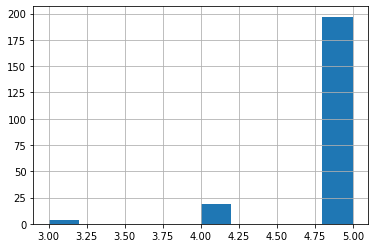

In [38]:
df['평점'].hist()

In [40]:
def rating_to_label(rating):
    if rating > 4.5:
        return 1
    else:
        return 0
    
df['y'] = df['평점'].apply(lambda x: rating_to_label(x))

In [41]:
df.head()

,Unnamed: 0,평점,선택옵션,리뷰,y
0,0,5,선택옵션 남성양말 상품옵션명 13남성 라인 스포츠양말10켤레 색상 06색상섞기,양말 가격대비 좋습니다첨엔 긴목양말이길래 놀랬는데 서비스로 주신거네요 ㄱㅅ합니다추천합니다,1
1,1,5,선택옵션 여성양말 상품옵션명 2여성 골지 중목양말10켤레 색상 16아이보리,양말 품질이 좋아 여기서 주문합니다 흰색이 없어 아이보리로 주문했는데 교복에 신어도...,1
2,2,5,선택옵션 여성양말 상품옵션명 2여성 골지 중목양말10켤레 색상 17오트밀,국산양말입니다 짱짱하고 좋아요 지난번 주문하고 좋아서 다시 찾아 주문했습니다 덤까지...,1
3,3,5,선택옵션 여성양말 상품옵션명 1여성 무지 중목양말10켤레 색상 07블랙,생각보다 기대이상으로 좋습니다상품의 질도 좋고 색상과 가격면에서코 아주 착하고 마음...,1
4,4,5,선택옵션 남성양말 상품옵션명 5남성 무지 중목양말10켤레 색상 01그레이,235240칼발 아주 잘 맞고 편해요 은은하게 괭택이 도는데 촌스럽지 않고 적당히 ...,1


In [42]:
df["y"].value_counts()

1    197
0     23
Name: y, dtype: int64

train / test set 나누기

In [43]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [44]:
x_train.shape, y_train.shape

((154, 301), (154,))

**모델 학습**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [46]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.88
precision: 0.88
recall: 1.00
F1: 0.94


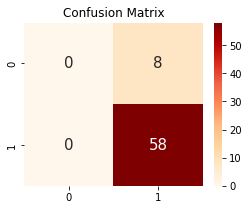

In [47]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

=> 지나치게 긍정으로 예측 : 클래스 불균형 해결 필요

In [48]:
df['y'].value_counts()

1    197
0     23
Name: y, dtype: int64

In [50]:
positive_random_idx = df[df['y']==1].sample(23, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(23, random_state=12).index.tolist()

In [51]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [52]:
x_train.shape, y_train.shape

((34, 301), (34,))

In [53]:
x_test.shape, y_test.shape

((12, 301), (12,))

**모델 재학습**

In [54]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [55]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.50
precision: 0.38
recall: 0.75
F1: 0.50


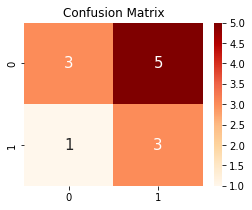

In [56]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

### 6 긍정 / 부정 키워드 분석

In [57]:
lr2.coef_

array([[-0.18498366,  0.        , -0.18114563,  0.        ,  0.        ,
         0.        ,  0.        ,  0.16222357,  0.        ,  0.        ,
         0.        ,  0.11402899,  0.        ,  0.        ,  0.        ,
         0.36340132,  0.        ,  0.        ,  0.        ,  0.13087263,
         0.        , -0.13911352,  0.        , -0.29806192,  0.        ,
         0.12493578,  0.        ,  0.19724532,  0.        ,  0.18745531,
        -0.29806192,  0.        , -0.02529586,  0.        ,  0.        ,
         0.17142817,  0.        ,  0.        ,  0.        ,  0.11402899,
         0.        ,  0.        , -0.27771527,  0.35681021,  0.        ,
         0.        ,  0.13087263,  0.12493578,  0.09911473,  0.10985299,
         0.        ,  0.23716695,  0.        ,  0.        , -0.1168719 ,
        -0.12091836,  0.        , -0.01878977,  0.        ,  0.        ,
         0.17142817,  0.2128056 ,  0.16222357, -0.1982215 ,  0.        ,
         0.        ,  0.        , -0.35548384,  0. 

<BarContainer object of 301 artists>

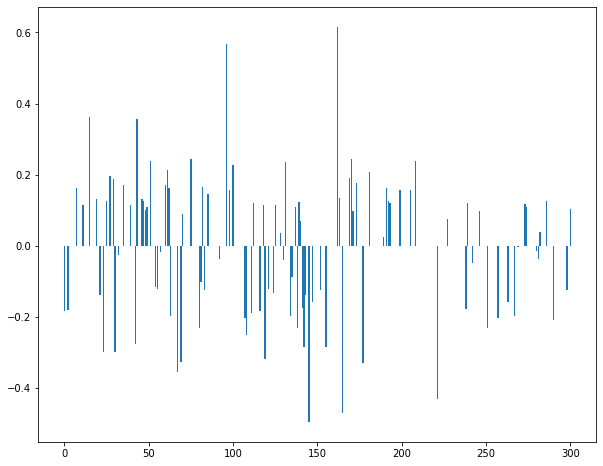

In [58]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [59]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(0.6161112490830583, 162), (0.5679467203928492, 96), (0.3634013157070791, 15), (0.3568102120420898, 43), (0.24480393368530007, 170)]
[(-0.3299743165524552, 177), (-0.3554838402917098, 67), (-0.43079104803952395, 221), (-0.4703529944558865, 165), (-0.49588248456708334, 145)]


In [60]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(0.6161112490830583, 162),
 (0.5679467203928492, 96),
 (0.3634013157070791, 15),
 (0.3568102120420898, 43),
 (0.24480393368530007, 170),
 (0.2442876934042926, 75),
 (0.23940544446543627, 208),
 (0.2371669547544856, 51),
 (0.2346438892394898, 131),
 (0.22805798993379509, 100),
 (0.21280559564574253, 61),
 (0.20835167714373157, 181),
 (0.19724532148463023, 27),
 (0.19104749752201133, 169),
 (0.18745530529191523, 29),
 (0.1757424682889749, 173),
 (0.17142817259019436, 60),
 (0.17142817259019436, 35),
 (0.16629774989878576, 82),
 (0.16222357138326923, 191),
 (0.16222357138326923, 62),
 (0.16222357138326923, 7),
 (0.15649927782157075, 205),
 (0.15649927782157075, 199),
 (0.15649927782157075, 98),
 (0.14537660929110552, 85),
 (0.13346397763335432, 163),
 (0.13087262973084043, 46),
 (0.13087262973084043, 19),
 (0.12493578339145157, 286),
 (0.12493578339145157, 192),
 (0.12493578339145157, 47),
 (0.12493578339145157, 25),
 (0.12213363952822974, 139),
 (0.12157129045011816, 239),
 (0.121571290

In [61]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{0: '가격',
 1: '가성',
 2: '가지',
 3: '감동',
 4: '감사',
 5: '감촉',
 6: '강추임',
 7: '개인',
 8: '거의',
 9: '걱정',
 10: '건조기',
 11: '검은색',
 12: '검정',
 13: '검정색',
 14: '게다가',
 15: '겨울',
 16: '겹치',
 17: '계속',
 18: '계절',
 19: '고급',
 20: '고등학생',
 21: '고무줄',
 22: '고저',
 23: '고힘',
 24: '골지',
 25: '공용',
 26: '괭택',
 27: '교복',
 28: '교체',
 29: '구매',
 30: '구멍',
 31: '구성은',
 32: '구입',
 33: '국산',
 34: '그게',
 35: '금도',
 36: '금방',
 37: '기네',
 38: '기대',
 39: '기본',
 40: '기분',
 41: '기존',
 42: '길이',
 43: '까슬까슬',
 44: '나머지',
 45: '나일론',
 46: '나중',
 47: '남녀',
 48: '남자',
 49: '남편',
 50: '네이비',
 51: '누가',
 52: '느낌',
 53: '는걸',
 54: '다른',
 55: '다만',
 56: '다시',
 57: '다음',
 58: '다재',
 59: '달라',
 60: '대량',
 61: '대비',
 62: '대안',
 63: '대충',
 64: '도착',
 65: '돌이',
 66: '동생',
 67: '두께',
 68: '뒤꿈치',
 69: '듭니',
 70: '디자인',
 71: '디테일',
 72: '따님',
 73: '딸내미',
 74: '딸신',
 75: '딸아이',
 76: '때문',
 77: '땡땡',
 78: '또한',
 79: '랜덤',
 80: '렌덤',
 81: '리다',
 82: '마감',
 83: '마음',
 84: '마자',
 85: '만세',
 86: '만족',
 87: '말로',
 88: '매번',
 89: '매일',
 

In [62]:
# 긍정 리뷰 키워드
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

신고 0.6161112490830583
무난 0.5679467203928492
겨울 0.3634013157070791
까슬까슬 0.3568102120420898
아빠 0.24480393368530007
딸아이 0.2442876934042926
용기 0.23940544446543627
누가 0.2371669547544856
사은 0.2346438892394898
무지 0.22805798993379509
대비 0.21280559564574253
약간 0.20835167714373157
교복 0.19724532148463023
아들 0.19104749752201133
구매 0.18745530529191523
아주 0.1757424682889749
대량 0.17142817259019436
금도 0.17142817259019436
마감 0.16629774989878576
여러가지 0.16222357138326923


In [63]:
# 부정 리뷰 키워드
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

서비스 -0.49588248456708334
신어 -0.4703529944558865
이즈 -0.43079104803952395
두께 -0.3554838402917098
앏아 -0.3299743165524552
듭니 -0.3265165219617198
보풀 -0.31905819758408616
고힘 -0.29806191546896715
구멍 -0.29806191546896715
생각 -0.2835770790043827
소재 -0.2835347807980272
길이 -0.2777152697069983
발목 -0.25164184480006074
렌덤 -0.23111942963632387
상사 -0.23111942963632387
중복 -0.23111942963632387
학생 -0.20840346888811223
발견 -0.20211459090138925
지도 -0.20211459090138925
대충 -0.1982214959523176
